In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

## Importing the Data

In [2]:
actualData = pd.read_csv('insaurance_dataset.csv')
actualData.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


## Exploratory Data Analysis

Observations from the data:
Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).
Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
Values of -1 indicate that the feature was missing from the observation.
The target columns signifies whether or not a claim was filed for that policy holder.

In [3]:
actualData.shape

(595212, 59)

In [4]:
actualData.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [5]:
#Checking for duplicate rows and removing them if there are any.
actualData.drop_duplicates()
actualData.shape

(595212, 59)

No duplicate rows found in the data.

In [6]:
# Information about the data
actualData.info

<bound method DataFrame.info of              id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_c

In [7]:
# Checking for null values in the data
actualData.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


##### Checking for missing values
Missings are represented as -1

In [8]:
vars_with_missing = []
for f in actualData.columns:
    missings = actualData[actualData[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/actualData.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


ps_car_03_cat and ps_car_05_cat has more missing values,so removing those rows
For the other categorical variables with missing values, we can leave the missing value -1 as such.
ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

In [9]:
actualData.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1,inplace=True)


In [10]:
# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
actualData['ps_reg_03'] = mean_imp.fit_transform(actualData[['ps_reg_03']]).ravel()
actualData['ps_car_12'] = mean_imp.fit_transform(actualData[['ps_car_12']]).ravel()
actualData['ps_car_14'] = mean_imp.fit_transform(actualData[['ps_car_14']]).ravel()
actualData['ps_car_11'] = mode_imp.fit_transform(actualData[['ps_car_11']]).ravel()


In [11]:
vars_with_missing = []
for f in actualData.columns:
    missings = actualData[actualData[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/actualData.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
In total, there are 7 variables with missing values


Now, only we have 7 variables with missing values and all these variables are categorical values.

In [12]:
actualData.shape

(595212, 57)

### Outlier Detection

In [13]:
data_outlier = actualData

zscore=np.abs(stats.zscore(data_outlier))
print(zscore)

threshold=3
print(np.where(zscore >3))

[[1.7323077  0.19448956 0.0502179  ... 0.63472992 0.73222528 2.34997253]
 [1.73230305 0.19448956 0.45386836 ... 0.63472992 1.36569991 0.42553689]
 [1.73229373 0.19448956 1.56247669 ... 0.63472992 1.36569991 0.42553689]
 ...
 [1.73327863 0.19448956 0.45386836 ... 0.63472992 0.73222528 0.42553689]
 [1.73328794 0.19448956 1.56247669 ... 1.57547323 0.73222528 0.42553689]
 [1.73330192 0.19448956 0.95795462 ... 0.63472992 0.73222528 0.42553689]]
(array([     2,      5,      5, ..., 595203, 595206, 595207], dtype=int64), array([ 3, 21, 22, ..., 22, 25, 49], dtype=int64))


{'whiskers': [<matplotlib.lines.Line2D at 0x2470506aa30>,
 'caps': [<matplotlib.lines.Line2D at 0x24705081130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2470506a6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x247050817f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24705081af0>],
 'means': []}

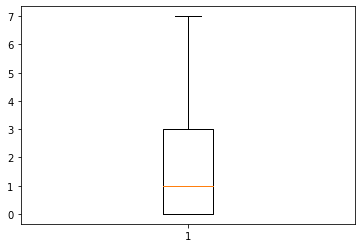

In [14]:
plt.boxplot(actualData['ps_ind_01']) #boxplot without circles indicate no outliers

# Visualizing the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x247051150d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24705115790>,
 'boxes': [<matplotlib.lines.Line2D at 0x24705109d30>],
 'medians': [<matplotlib.lines.Line2D at 0x24705115e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2470511f190>],
 'means': []}

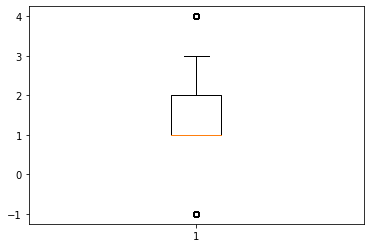

In [15]:

plt.boxplot(actualData['ps_ind_02_cat'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2470516d6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2470516dd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2470516d340>],
 'medians': [<matplotlib.lines.Line2D at 0x24705178460>],
 'fliers': [<matplotlib.lines.Line2D at 0x24705178760>],
 'means': []}

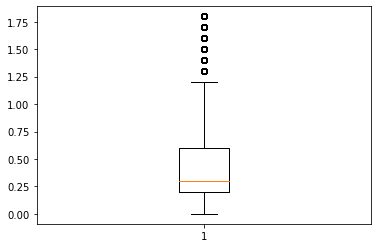

In [16]:
plt.boxplot(actualData['ps_reg_02'])

{'whiskers': [<matplotlib.lines.Line2D at 0x247051cd9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x247051d80d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x247051cd670>],
 'medians': [<matplotlib.lines.Line2D at 0x247051d8790>],
 'fliers': [<matplotlib.lines.Line2D at 0x247051d8a90>],
 'means': []}

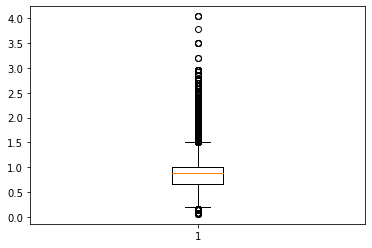

In [17]:
plt.boxplot(actualData['ps_reg_03'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24705224fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x247052316a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24705224c40>],
 'medians': [<matplotlib.lines.Line2D at 0x24705231d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2470523d0a0>],
 'means': []}

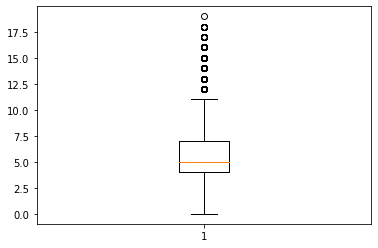

In [18]:
 plt.boxplot(actualData['ps_calc_11'])

## Treating the outliers

In [19]:
print(actualData['ps_ind_02_cat'].quantile(0.10))
print(actualData['ps_ind_02_cat'].quantile(0.90))

1.0
2.0


In [20]:
actualData["ps_ind_02_cat"] = np.where(actualData["ps_ind_02_cat"] <1.0, 1.0,actualData['ps_ind_02_cat'])
actualData["ps_ind_02_cat"] = np.where(actualData["ps_ind_02_cat"] >2.0, 2.0,actualData['ps_ind_02_cat'])
print(actualData['ps_ind_02_cat'].skew())

1.012972044802881


In [21]:
print(actualData['ps_reg_02'].quantile(0.10))
print(actualData['ps_reg_02'].quantile(0.90))

0.0
1.1


In [22]:
actualData["ps_reg_02"] = np.where(actualData["ps_reg_02"] <0.0, 0.0,actualData['ps_reg_02'])
actualData["ps_reg_02"] = np.where(actualData["ps_reg_02"] >1.1, 1.1,actualData['ps_reg_02'])
print(actualData['ps_reg_02'].skew())

0.7855733048863727


In [23]:
print(actualData['ps_reg_03'].quantile(0.10))
print(actualData['ps_reg_03'].quantile(0.90))

0.5550900828
1.3439680056


In [24]:
actualData["ps_reg_03"] = np.where(actualData["ps_reg_03"] <0.55, 0.56,actualData['ps_reg_03'])
actualData["ps_reg_03"] = np.where(actualData["ps_reg_03"] >1.34, 1.34,actualData['ps_reg_03'])
print(actualData['ps_reg_03'].skew())

0.5453827969101251


In [25]:
print(actualData['ps_calc_11'].quantile(0.10))
print(actualData['ps_calc_11'].quantile(0.90))
print(actualData['ps_calc_11'].skew())

3.0
9.0
0.4306274790224238


In [26]:
actualData["ps_calc_11"] = np.where(actualData["ps_calc_11"] <3.0, 3.0,actualData['ps_calc_11'])
actualData["ps_calc_11"] = np.where(actualData["ps_calc_11"] >9.0, 9.0,actualData['ps_calc_11'])
print(actualData['ps_calc_11'].skew())

0.34403131925774605


# Correlation among variables

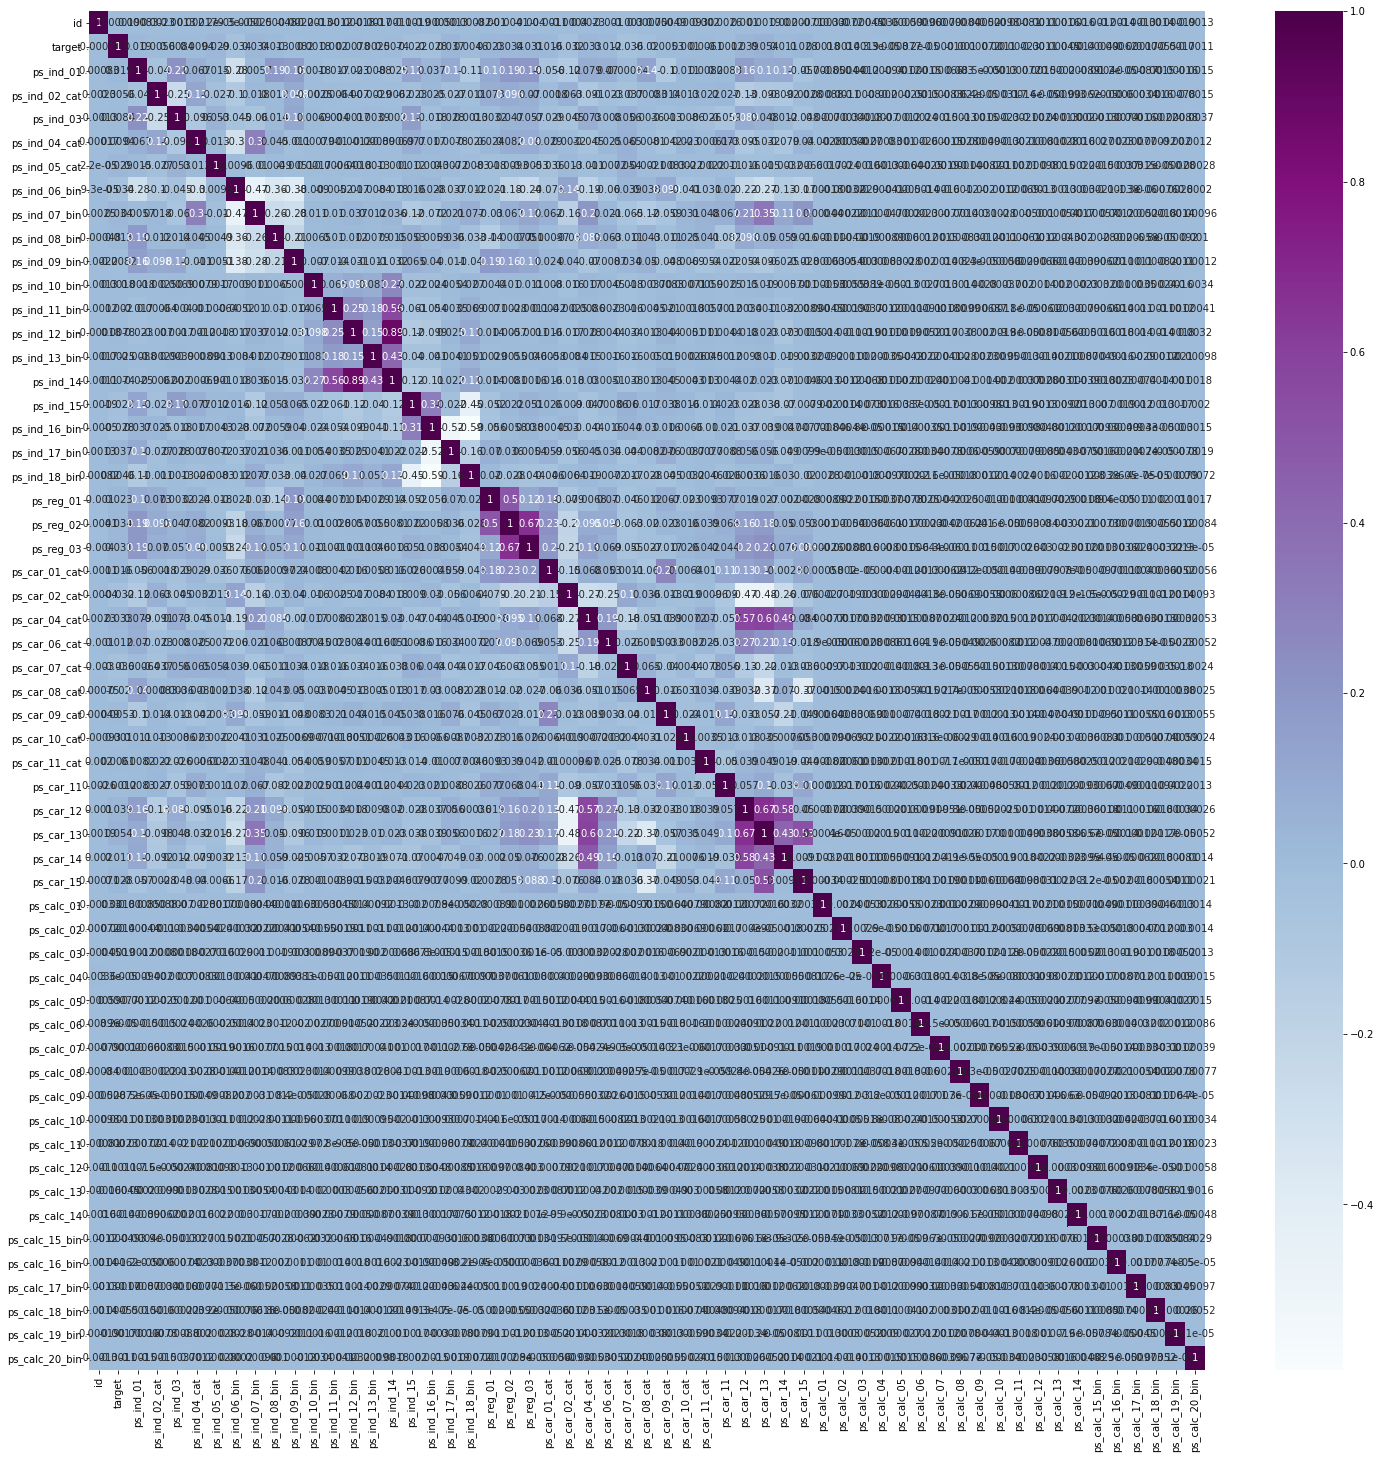

In [27]:
corr = actualData.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(25,25))
#Plotting the heat map
hm=sb.heatmap(actualData[top_corr_features].corr(),annot=True,cmap="BuPu")

There are a strong correlations between the variables:

ps_reg_02 and ps_reg_03 (0.7)
ps_car_12 and ps_car13 (0.67)
ps_car_12 and ps_car14 (0.58)
ps_car_13 and ps_car15 (0.67)

In [28]:
# Taking sample from the data to speed up the process
s = actualData.sample(frac=0.1)

#### ps_reg_02 and ps_reg_03

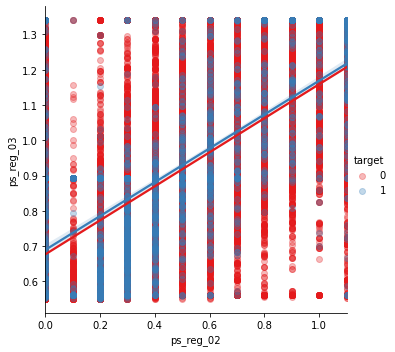

In [29]:
sb.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_13

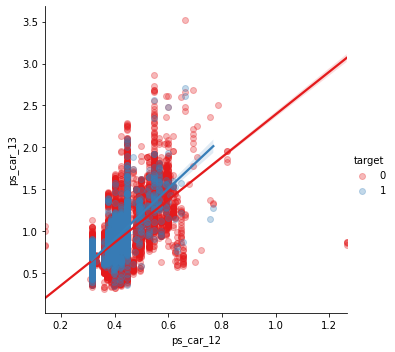

In [30]:
sb.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car14

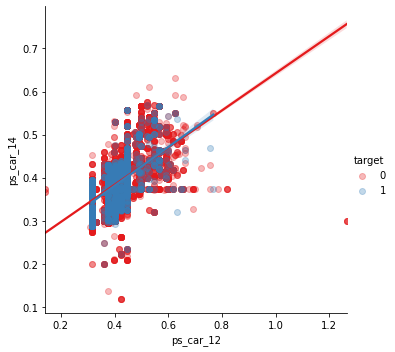

In [31]:
sb.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 and ps_car_15

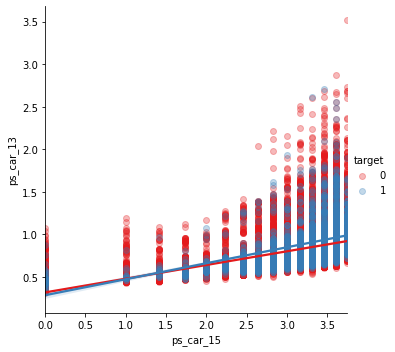

In [32]:
sb.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

## Handling Imbalanced Classes 

F:\Anaconda\anaconda setup\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


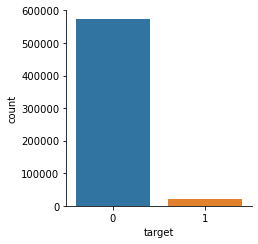

In [33]:

# Checking values for target
sb.catplot('target',data=actualData,kind='count',size = 3.5)

The proportion of records with target=1 is far less than target=0.So,for balancing the dataset we can go for SMOTE



## Smote Technique

In [34]:
from imblearn.over_sampling import SMOTE

#Defining X and y
X = actualData.drop(['id', 'target'], axis=1)
y = actualData['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (416648, 55)
Number transactions y_train dataset:  (416648,)
Number transactions X_test dataset:  (178564, 55)
Number transactions y_test dataset:  (178564,)


## Choosing only essential features

In [35]:
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

In [36]:
essential_features = cols
print(essential_features)

['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']


In [37]:
cleanData = actualData[essential_features]

### Creating and Training, Model

In [38]:
X = cleanData
y = actualData['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)



Number transactions X_train dataset:  (416648, 21)
Number transactions y_train dataset:  (416648,)
Number transactions X_test dataset:  (178564, 21)
Number transactions y_test dataset:  (178564,)


In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 15215
Before OverSampling, counts of label '0': 401433 

After OverSampling, the shape of train_X: (802866, 21)
After OverSampling, the shape of train_y: (802866,) 

After OverSampling, counts of label '1': 401433
After OverSampling, counts of label '0': 401433


In [40]:
model = RandomForestClassifier()
model.fit(X_train_res,y_train_res)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)


0.962853654712036

### PCA

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(cleanData)

StandardScaler()

In [43]:
scaled_data = scaler.transform(cleanData)

In [44]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=11)

In [63]:
pca.fit(scaled_data)

PCA(n_components=11)

In [72]:
x_pca = pd.DataFrame(pca.transform(scaled_data))
x_pca

,0,1,2,3,4,5,6,7,8,9,10
0,0.553673,0.439976,-0.755657,0.350711,-0.466016,2.983381,1.350842,0.974653,0.431455,-0.106790,-1.519486
1,-0.910141,1.849411,-1.875923,0.960373,0.034239,-0.996143,-1.292329,-0.475452,-1.055972,-0.418251,0.749572
2,-1.113224,-1.845692,0.871548,0.924891,-1.617016,1.655210,0.527728,-0.602188,1.113772,-1.089161,1.497933
3,-3.005622,-0.509875,0.088581,0.043160,1.520306,-1.200156,1.000472,-0.352500,-0.167717,0.196587,0.358355
4,-1.993083,-1.501653,-0.858491,-1.973729,0.334145,-0.692204,0.617292,1.890689,-0.436413,-0.195878,0.321547
...,...,...,...,...,...,...,...,...,...,...,...
595207,0.129480,-1.667978,1.136382,2.450962,-0.937283,0.004164,-0.357293,-1.174209,-1.382113,0.171614,-0.540329
595208,2.645441,-1.230951,-0.723682,-0.199957,0.451583,-0.907132,1.366959,-2.338240,0.135453,0.595325,0.742550
595209,-1.340727,-0.751212,1.371145,1.686778,1.813764,-1.271565,-0.300470,0.410015,-1.397164,-0.171066,0.369765
595210,0.351913,-1.818364,-0.080200,-0.881641,-0.421431,0.826163,0.330774,0.980776,-1.184982,0.005223,0.435247


In [73]:
scaled_data.shape

(595212, 21)

In [74]:
x_pca.shape

(595212, 11)

In [75]:
# calculate variance
var=pca.explained_variance_ratio_
var

array([0.13372811, 0.10052474, 0.09005954, 0.07254335, 0.06733443,
       0.06261122, 0.0537539 , 0.05030657, 0.0475473 , 0.04597952,
       0.04449626])

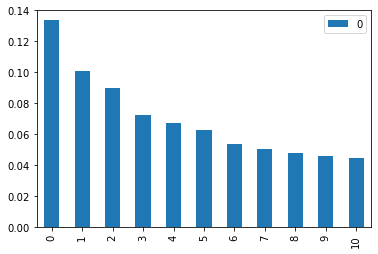

In [76]:
# plotting bar graph
var1 = pd.DataFrame(var)
var1.plot(kind='bar')

In [ ]:
pca.components_

In [78]:
X = x_pca.iloc[:,:]
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.553673,0.439976,-0.755657,0.350711,-0.466016,2.983381,1.350842,0.974653,0.431455,-0.106790,-1.519486
1,-0.910141,1.849411,-1.875923,0.960373,0.034239,-0.996143,-1.292329,-0.475452,-1.055972,-0.418251,0.749572


In [79]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [81]:
model_pca = RandomForestClassifier()
model_pca.fit(X_train,y_train)
y_predict = model_pca.predict(X_test)
accuracy_score(y_test,y_predict)

0.9626016442283999

Text(0, 0.5, 'Second Principal comaponent')

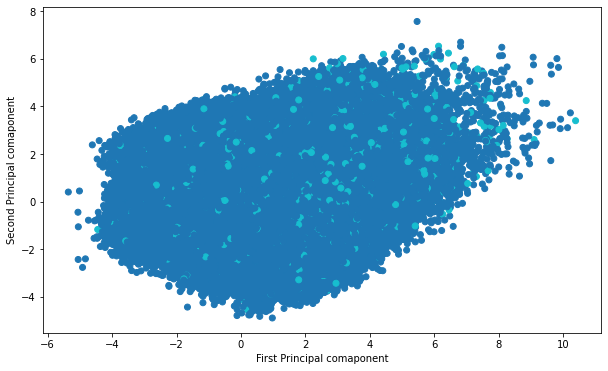

In [82]:
# graph 
plt.figure(figsize=(10,6))
plt.scatter(x=X.iloc[:,0],
            y=X.iloc[:,1],
            c=actualData['target'],
            cmap='tab10'
           )
plt.xlabel("First Principal comaponent")
plt.ylabel("Second Principal comaponent")

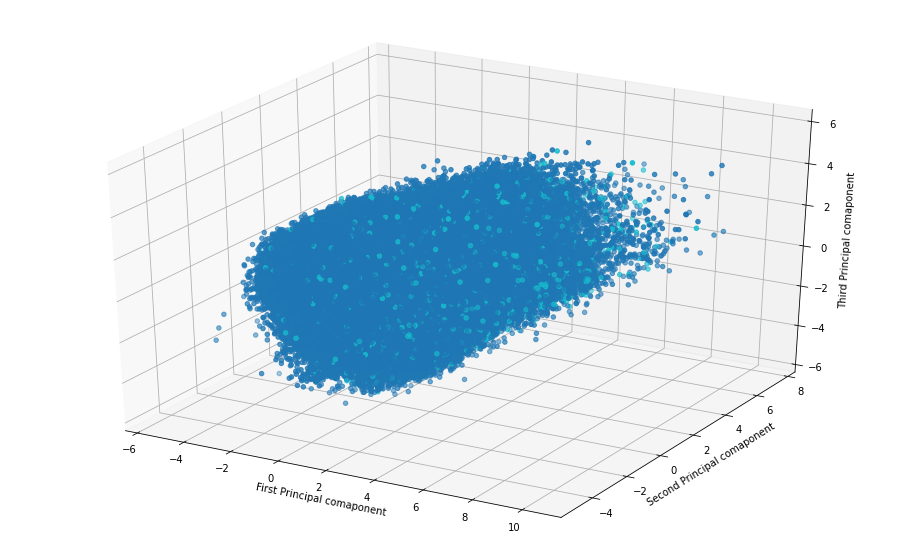

In [83]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X.iloc[:,0], 
    ys=X.iloc[:,1], 
    zs=X.iloc[:,2], 
    c=actualData['target'],
    cmap='tab10'
)
ax.set_xlabel('First Principal comaponent')
ax.set_ylabel('Second Principal comaponent')
ax.set_zlabel('Third Principal comaponent')
plt.show()

##### RESULT :
    1.Accuracy Score
    2.Confusion Matrix
    3.Error
    4.Precision
    5.Recall
    6.F1 Score
    7.Evaluating Precision, recall,F1 score matrix
    8.Roc Auc Score & Curve

##### 1.Accuracy Score

In [84]:
# acuracy score
accuracy_score(y_test,y_predict)

0.9626016442283999

#####     2.Confusion Matrix

In [85]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 171887, 1: 6677})


col_0,0,1
target,,
0,171886,1
1,6677,0


In [86]:
confusion_matrix(y_test,y_predict)

array([[171886,      1],
       [  6677,      0]], dtype=int64)

#####     3.Error

In [87]:
# errrors
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.0373983557716001
0.1933865449600879


#####     4.Precision

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict))

Precision: 0.000


#####     5.Recall

In [89]:
# Recall 
print('Recall: %.3f' % recall_score(y_test,y_predict))

Recall: 0.000


#####     6.F1 Score

In [90]:
# F1_score 
print('F1_score: %.3f' % f1_score(y_test,y_predict))

F1_score: 0.000


#####     7.Evaluating Precision, recall,F1 score matrix

In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    171887
           1       0.00      0.00      0.00      6677

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.94    178564



#####     8.Roc Auc Score & Curve

In [92]:
model_pca.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
model_pca.predict_proba(X_test)

array([[0.97, 0.03],
       [1.  , 0.  ],
       [0.93, 0.07],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.89, 0.11]])

In [94]:
y_predict_th2 = np.where(model_pca.predict_proba(X_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model_pca.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model_pca.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [95]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
target,,
0,171878,9
1,6677,0


In [96]:
def predict_threshold (model_pca,X_test,thresholds):
    import numpy as np
    return np.where(model_pca.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [97]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model_pca,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[ 15151 156736]
 [   421   6256]]
Threshold : 0.1
[[161680  10207]
 [  5979    698]]
Threshold : 0.2
[[171014    873]
 [  6611     66]]
Threshold : 0.30000000000000004
[[171781    106]
 [  6670      7]]
Threshold : 0.4
[[171878      9]
 [  6677      0]]
Threshold : 0.5
[[171886      1]
 [  6677      0]]
Threshold : 0.6000000000000001
[[171887      0]
 [  6677      0]]
Threshold : 0.7000000000000001
[[171887      0]
 [  6677      0]]
Threshold : 0.8
[[171887      0]
 [  6677      0]]
Threshold : 0.9
[[171887      0]
 [  6677      0]]
Threshold : 1.0
[[171887      0]
 [  6677      0]]


In [98]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize
probs = model_pca.predict_proba(X_test)
y_score = probs

In [99]:
y=label_binarize(y, classes=[0,1])
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [100]:
fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [101]:
for i in range(0,2):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [102]:
print(roc_auc_score)

0.5699010072584101


In [103]:
fpr

{0: array([0.        , 0.06305227, 0.1752284 , 0.30537667, 0.43178074,
        0.5517448 , 0.64744646, 0.72307923, 0.78029055, 0.82821626,
        0.86565823, 0.89546203, 0.91897559, 0.93230493, 0.94758125,
        0.95641755, 0.96465479, 0.97319155, 0.97798412, 0.98217762,
        0.98637112, 0.99011532, 0.99191254, 0.99430882, 0.9953572 ,
        0.99640557, 0.99700464, 0.99805302, 0.99835255, 0.99850232,
        0.99895162, 0.99895162, 0.99910139, 0.9995507 , 0.9995507 ,
        0.99970046, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 1: array([0.00000000e+00, 5.81777563e-06, 1.74533269e-05, 2.90888782e-05,
        5.23599807e-05, 7.56310832e-05, 9.30844101e-05, 1.39626615e-04,
        2.32711025e-04, 3.43248762e-04, 4.24697621e-04, 4.88693153e-04,
        6.16684217e-04, 7.27221954e-04, 8.78484120e-04, 1.05883516e-03,
        1.29154619e-03, 1.65224828e-03, 2.05949257e-03, 2.56563905e-03,
        3.17650549e-03, 4.060807

In [104]:
tpr

{0: array([0.        , 0.08814512, 0.23408984, 0.39286857, 0.53645127,
        0.65281842, 0.74074246, 0.80793777, 0.85682454, 0.89421539,
        0.92081426, 0.94061796, 0.95456317, 0.96477337, 0.97288335,
        0.97910837, 0.98377422, 0.98724744, 0.98981307, 0.9919482 ,
        0.99361208, 0.99492108, 0.99593919, 0.99682349, 0.99743436,
        0.99794051, 0.99834775, 0.99870845, 0.99894116, 0.99912152,
        0.99927278, 0.99938332, 0.99951131, 0.9995753 , 0.99965675,
        0.99976729, 0.99986037, 0.99990692, 0.99992437, 0.99994764,
        0.99997091, 0.99998255, 0.99999418, 1.        ]),
 1: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.99535720e-04, 4.49303579e-04, 4.49303579e-04, 8.98607159e-04,
        1.04837502e-03, 1.04837502e-03, 1.49767860e-03, 1.64744646e-03,
        1.94698218e-03, 2.99535720e-03, 3.59442864e-03, 4.64280365e-03,
        5.69117867e-03, 8.087464

In [105]:
threshold

{0: array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
        0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
        0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
        0.68, 0.67, 0.66, 0.64, 0.62, 0.61, 0.6 , 0.58, 0.55, 0.52, 0.4 ]),
 1: array([1.6 , 0.6 , 0.48, 0.44, 0.41, 0.4 , 0.39, 0.37, 0.35, 0.34, 0.33,
        0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22,
        0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11,
        0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])}

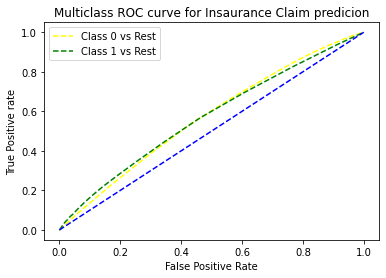

In [106]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for Insaurance Claim predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);